In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

import matplotlib as mpl
mpl.style.use('default')

In [2]:
df_final = pd.read_csv('../results/back-testing_delta-gamma.csv', index_col=[0])

In [4]:
df_final.date.min()

'2023-11-27'

In [10]:
df_final.date = pd.to_datetime(df_final.date).dt.date

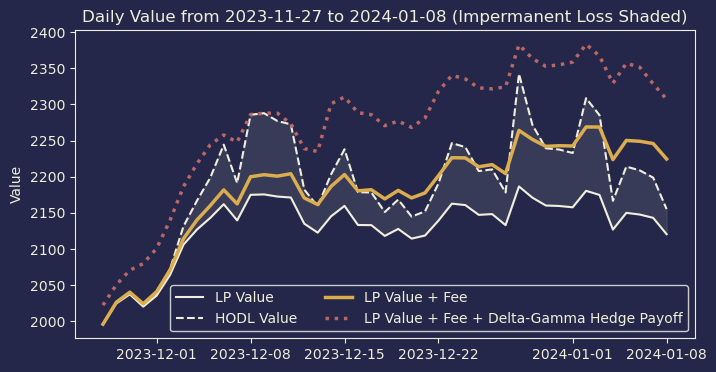

In [24]:
_ = plt.figure(figsize=(8,4), facecolor='#242749')
ax = plt.axes()
ax.set_facecolor('#242749')

mpl.rcParams['text.color'] = '#F0EEDC'
mpl.rcParams['axes.labelcolor'] = '#F0EEDC'

ax.spines['bottom'].set_color('#F0EEDC')
ax.spines['top'].set_color('#F0EEDC') 
ax.spines['right'].set_color('#F0EEDC')
ax.spines['left'].set_color('#F0EEDC')

ax.tick_params(axis='x', colors='#F0EEDC')
ax.tick_params(axis='y', colors='#F0EEDC')

ax = sns.lineplot(x=df_final.date, y=df_final.amountV, label='LP Value', color='#F0EEDC')
sns.lineplot(x=df_final.date, y=df_final.HODL, label='HODL Value', color='#F0EEDC', linestyle='--')
sns.lineplot(x=df_final.date, y=df_final.amountV + 
                                df_final.feecumsum, label='LP Value + Fee', color='#DBAD4F', linewidth=2.5)
sns.lineplot(x=df_final.date, y=df_final.amountV + 
                                df_final.feecumsum + 
                                df_final.pp_cumsum_payoff + 
                                df_final.delta_cumsum_payoff, linestyle=':',
             label='LP Value + Fee + Delta-Gamma Hedge Payoff', color='#B96666', linewidth=2.5)

ax.fill_between(df_final.date, list(df_final.amountV), list(df_final.HODL), color='#F0EEDC', alpha=0.1)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

plt.title('Daily Value from {} to {} (Impermanent Loss Shaded)'.format(
    df_final.date.min(), df_final.date.max()))
plt.ylabel('Value')
plt.xlabel(None)
legend = plt.legend(ncol=2)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.savefig('viz_back-testing.png', dpi=500, bbox_inches='tight')
plt.show()